In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import re

In [3]:
column_names = [
    'chrom', 'start', 'end', 'name', 'score', 'strand',
    'signalValue', 'pValue', 'qValue', 'peak'
]

fat = pd.read_csv("GSM4256374_Duroc_2W_1_Fat_ATAC.narrowPeak.gz", sep='\t', header=None, names=column_names)
fat

,chrom,start,end,name,score,strand,signalValue,pValue,qValue,peak
0,chr10,39875170,39876042,Peak_1,73727,.,19.32988,7372.79199,7363.99707,471
1,chr10,39875170,39876042,Peak_2,55144,.,15.91071,5514.40234,5506.71289,332
2,chr10,39875170,39876042,Peak_3,45223,.,13.97540,4522.37402,4515.44824,169
3,chr7,10867756,10868409,Peak_4,33579,.,18.64662,3357.98535,3351.41357,409
4,chrUn_NW_018084866v1,205041,205810,Peak_5,27127,.,16.41345,2712.71411,2706.27930,544
...,...,...,...,...,...,...,...,...,...,...
186332,chr6,69430662,69431861,Peak_186333,50,.,2.23464,5.00166,3.20817,598
186333,chr1,120806987,120808712,Peak_186334,50,.,1.88505,5.00121,3.20775,1640
186334,chr12,1904491,1905228,Peak_186335,50,.,1.93695,5.00062,3.20716,110
186335,chr10,12754952,12757490,Peak_186336,50,.,1.95122,5.00059,3.20714,319


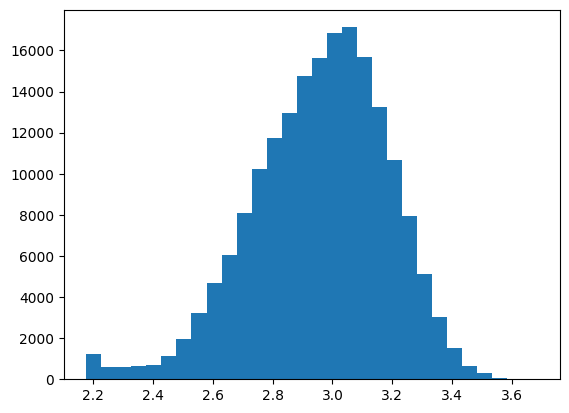

In [4]:
peak_sizes = fat["end"]-fat["start"] # histones have larger peaks than ATAC
plt.hist(np.log10(peak_sizes),30)
plt.show()

In [5]:
fat["qValue"].min() # so only significant stuff here

3.20704

In [6]:
tissue_assay = pd.DataFrame({ 
    "tissue" : [ re.search(r'[1-2]_([-A-Za-z]+)_[^_.]+\.narrowPeak', str(g)).group(1) for g in Path(".").glob("*.gz") ],
    "assay" : [ re.search(r'_([^_.]+)\.narrowPeak\.gz$', str(g)).group(1) for g in Path(".").glob("*.gz") ]
})
tissue_assay = tissue_assay.drop_duplicates()

In [7]:
from ..utils import merge_intervals

In [14]:
outdir = Path("merged")
outdir.mkdir(parents=True, exist_ok=True)

In [18]:
import time
og_files = []
out_files = []
for i in range(tissue_assay.shape[0]):
    start_time = time.time()
    tissue = tissue_assay["tissue"].iloc[i]
    assay = tissue_assay["assay"].iloc[i]
    files = Path(".").glob(f"*{tissue}_{assay}*.gz")
    df_all = pd.concat(
        [ pd.read_csv(g, sep='\t', header=None, names=column_names) 
         for g in files ],
        axis=0)
    merged = merge_intervals(df_all)
    outfile = f"{tissue} {assay}.bed.gz"
    merged.to_csv(outdir / outfile, sep = "\t", index = False, header = False)
    out_files.append(outfile)
    og_files.append(",".join(files)) 
    print(f"{tissue} {assay} done, took {time.time()-start_time}")

Liver H3K4me3 done, took 18.283493518829346
Thymus H3K27ac done, took 8.556457996368408
Fat ATAC done, took 104.21589875221252
Thymus H3K4me3 done, took 5.038900136947632
Pancreas H3K27ac done, took 16.969733238220215
Spleen H3K4me3 done, took 16.793147563934326
Muscle H3K4me3 done, took 17.733277082443237
Duodenum H3K4me3 done, took 6.663012742996216
Kidney H3K4me3 done, took 5.706010818481445
Muscle H3K27ac done, took 51.35510849952698
Lung H3K4me3 done, took 5.830154895782471
Cerebrum H3K27ac done, took 15.376641273498535
Muscle ATAC done, took 90.17065238952637
Heart H3K27ac done, took 55.233988523483276
Spleen H3K27ac done, took 45.12906241416931
Liver ATAC done, took 59.397194623947144
Heart H3K4me3 done, took 17.22424006462097
Kidney H3K27ac done, took 18.883554458618164
Liver H3K27ac done, took 60.671385526657104
Fat H3K4me3 done, took 19.20882797241211
Pancreas H3K4me3 done, took 5.949513673782349
Fat H3K27ac done, took 38.7342963218689
Duodenum H3K27ac done, took 19.286181449

In [38]:
os.chdir("../GSE143288")

In [42]:
import time
og_files = []
for i in range(tissue_assay.shape[0]):
    start_time = time.time()
    tissue = tissue_assay["tissue"].iloc[i]
    assay = tissue_assay["assay"].iloc[i]
    files = Path(".").glob(f"*{tissue}_{assay}*.gz")
    og_files.append(",".join([str(g) for g in files]))

In [44]:
tissue_assay["original"] = og_files

In [47]:
tissue_assay["filename"] = out_files
tissue_assay["species"] = "sus_scrofa"

In [48]:
meta = tissue_assay[["tissue","assay","species","filename","original"]]
meta.to_csv("meta.tsv", sep="\t", index=False)

In [30]:
fat_merged = merge_intervals(fat_all)

In [31]:
fat_merged

,chrom,start,end
0,chr1,2638,3411
1,chr1,14827,15035
2,chr1,21617,22727
3,chr1,23348,24285
4,chr1,42859,44305
...,...,...,...
177553,chrY_NW_018084777v1_random,301381,301654
177554,chrY_NW_018084777v1_random,303184,305177
177555,chrY_NW_018084780v1_random,52828,53039
177556,chrY_NW_018084782v1_random,52245,52773


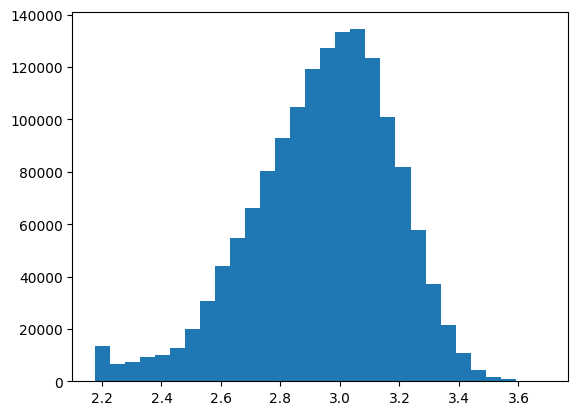

In [32]:
peak_sizes = fat_all["end"]-fat_all["start"] # histones have larger peaks than ATAC
plt.hist(np.log10(peak_sizes),30)
plt.show()